### This script contains the following:

#### 1. Importing libraries and data 
#### 2. Consistency checks
#### 3. Data preparation for cluster analysis
#### 4. The elbow technique
#### 5. k-means clustering

### 1. Importing libraries and data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.preprocessing import StandardScaler
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.


In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path =r'C:\Users\Lemlem TH\Desktop\CareerFoundry\Course\Data Immersion\Achievement 6\Agri_food_emission_analysis'

In [4]:
df = pd.read_csv(os.path.join(path, '02_Data','Prepared data', 'agri_food_emission.csv'))

### 2. Consistency checks

In [5]:
df.columns

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object')

In [6]:
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Albania,1990,5.5561,7.0253,59.2391,23.5200,110.5705,2.0,46.9645,72.8581,...,474.6951,0.0,0.0,320.8805,2086075.0,1195379.0,1676902.0,1618163.0,3475.291240,0.735750
1,Albania,1991,5.5561,7.0253,31.4625,6.2720,110.5705,2.0,47.9519,72.8581,...,469.1415,0.0,0.0,195.1879,2073348.0,1202083.0,1675168.0,1626914.0,5680.135772,-0.461500
2,Albania,1992,5.5561,7.0253,29.9373,1.8816,110.5705,2.0,40.5272,72.8581,...,453.2180,0.0,0.0,163.1332,2033508.0,1207079.0,1670550.0,1633189.0,5221.131572,0.318250
3,Albania,1993,5.5561,7.0253,44.0550,1.0976,110.5705,2.0,57.6592,72.8581,...,481.3836,0.0,0.0,126.8489,1983942.0,1205641.0,1663515.0,1637195.0,5316.973272,0.270500
4,Albania,1994,5.5561,7.0253,42.4253,0.0000,110.5705,3.0,72.4242,72.8581,...,620.2991,0.0,0.0,94.9545,1936056.0,1204539.0,1654796.0,1639203.0,5564.287672,1.202667


In [7]:
df.shape


(4546, 31)

#### Deriving variables

In [8]:
# Creat a new variable that represents total population 

df['Total Population']=df['Total Population - Male'] + df['Total Population - Female'] 

In [9]:
# Creat a new variable that represents per capita emission

df['Per Capita Emission']=(df['total_emission']/(df['Total Population']))

In [10]:
# Rename the column name Area

df.rename(columns = {'Area' : 'Country'},inplace = True)

#### Missing values check

In [11]:
# Check for missing values

df.isnull().sum()  # No missin value 

Country                            0
Year                               0
Savanna fires                      0
Forest fires                       0
Crop Residues                      0
Rice Cultivation                   0
Drained organic soils (CO2)        0
Pesticides Manufacturing           0
Food Transport                     0
Forestland                         0
Net Forest conversion              0
Food Household Consumption         0
Food Retail                        0
On-farm Electricity Use            0
Food Packaging                     0
Agrifood Systems Waste Disposal    0
Food Processing                    0
Fertilizers Manufacturing          0
IPPU                               0
Manure applied to Soils            0
Manure left on Pasture             0
Manure Management                  0
Fires in organic soils             0
Fires in humid tropical forests    0
On-farm energy use                 0
Rural population                   0
Urban population                   0
T

#### Duplicates Check

In [12]:
dups = df.duplicated()

In [13]:
dups.shape # No duplicates found

(4546,)

### 3. Data preparation for cluster analysis

#### Dropping catagorical variables

In [14]:
# Drop catagorical column as k-means algorithm can only handel numerical variables
df.drop(columns='Country', inplace=True)


### 4. The elbow technique

In [15]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [16]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\Lemlem TH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lemlem TH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lemlem TH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lemlem TH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

[-3.0838967343705824e+20,
 -2.658917667671388e+19,
 -1.353530529844696e+19,
 -9.297241613026615e+18,
 -6.506094993734631e+18,
 -4.956486403598582e+18,
 -3.5732399935977994e+18,
 -3.071048549620094e+18,
 -2.594664948304094e+18]

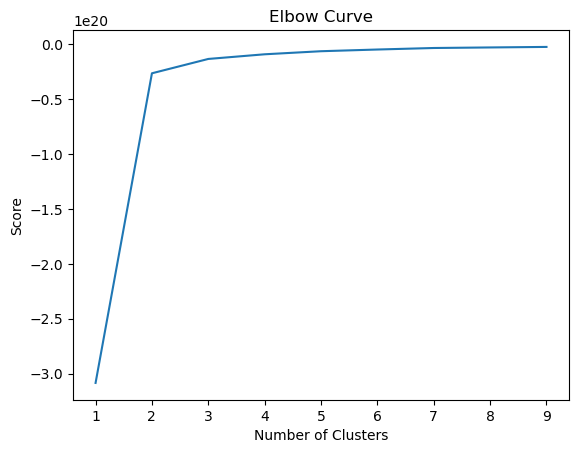

In [17]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The above graph suggests that the curve flattens after 3 in the x-axis. Therefore, the optimal count for my cluster is 3.

### 5. k-means clustering

In [18]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [19]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\Users\Lemlem TH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [20]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\Lemlem TH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [21]:
df.head()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C,Total Population,Per Capita Emission,clusters
0,1990,5.5561,7.0253,59.2391,23.5200,110.5705,2.0,46.9645,72.8581,0.0,...,320.8805,2086075.0,1195379.0,1676902.0,1618163.0,3475.291240,0.735750,3295065.0,0.001055,0
1,1991,5.5561,7.0253,31.4625,6.2720,110.5705,2.0,47.9519,72.8581,0.0,...,195.1879,2073348.0,1202083.0,1675168.0,1626914.0,5680.135772,-0.461500,3302082.0,0.001720,0
2,1992,5.5561,7.0253,29.9373,1.8816,110.5705,2.0,40.5272,72.8581,0.0,...,163.1332,2033508.0,1207079.0,1670550.0,1633189.0,5221.131572,0.318250,3303739.0,0.001580,0
3,1993,5.5561,7.0253,44.0550,1.0976,110.5705,2.0,57.6592,72.8581,0.0,...,126.8489,1983942.0,1205641.0,1663515.0,1637195.0,5316.973272,0.270500,3300710.0,0.001611,0
4,1994,5.5561,7.0253,42.4253,0.0000,110.5705,3.0,72.4242,72.8581,0.0,...,94.9545,1936056.0,1204539.0,1654796.0,1639203.0,5564.287672,1.202667,3293999.0,0.001689,0


In [22]:
df['clusters'].value_counts()

clusters
0    4145
2     308
1      93
Name: count, dtype: int64

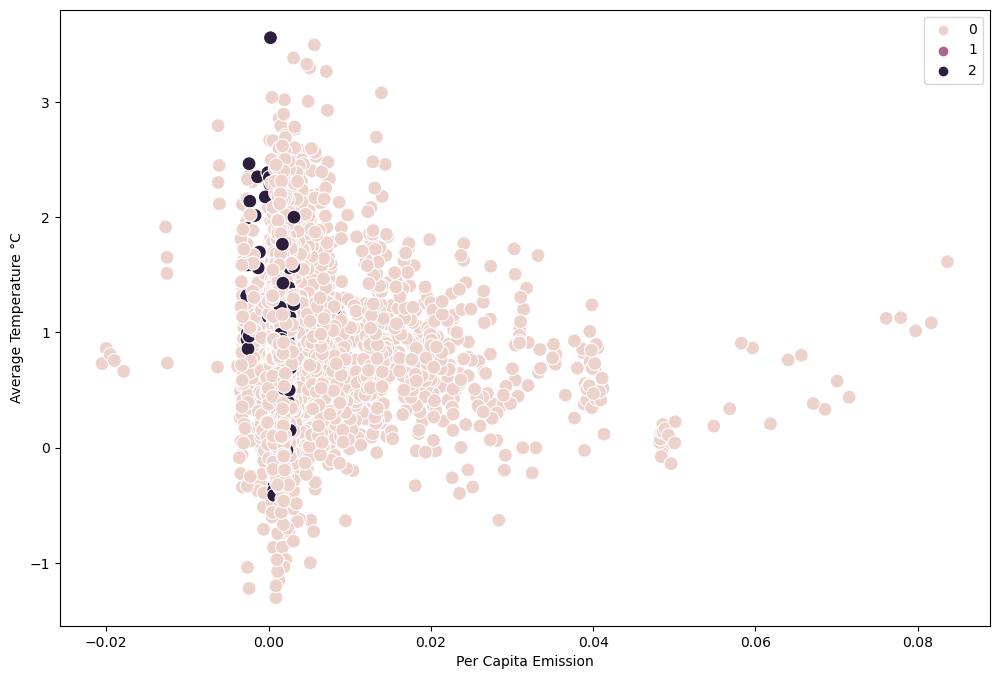

In [23]:
# Plot the clusters for the "Per Capita Emission" and "Average Temperature °C" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Per Capita Emission'], y=df['Average Temperature °C'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Per Capita Emission') # Label x-axis.
plt.ylabel('Average Temperature °C') # Label y-axis.
plt.show()

The clustering in this two varibles did not make sense for me. Because two differenrt clusters seem to represent similar data.

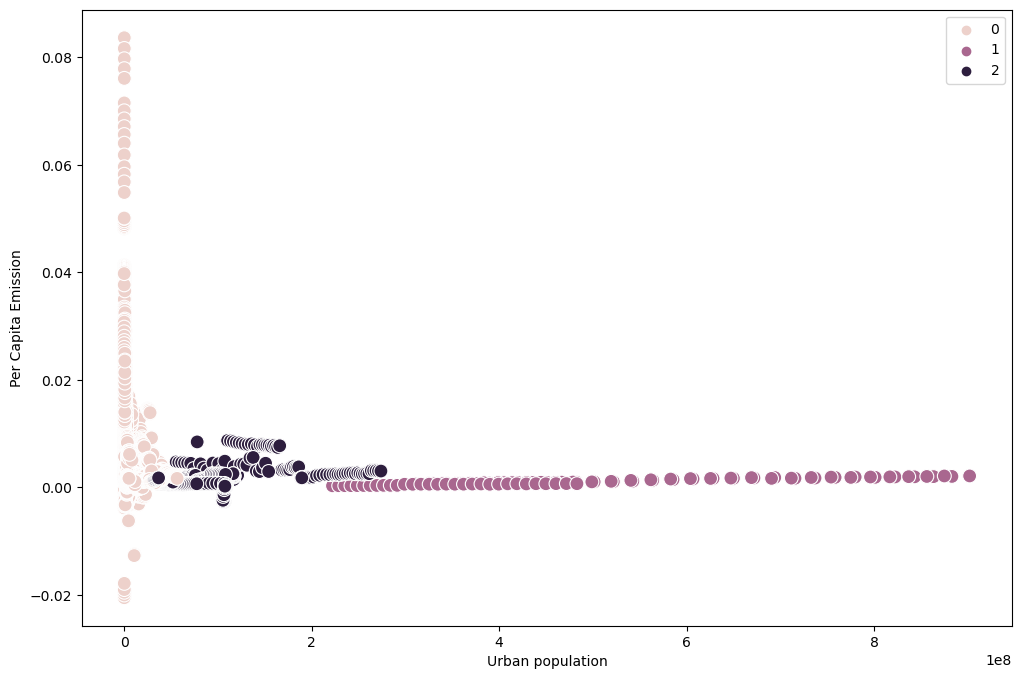

In [24]:
# Plot the clusters for the "Per Capita Emission" and "Average Temperature °C" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Urban population'], y=df['Per Capita Emission'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Urban population') # Label x-axis.
plt.ylabel('Per Capita Emission') # Label y-axis.
plt.show()

Here the clustering seem to make sense in some instances. The first cluster seem to represent points with low population size and, both  low and high per capita emission. This is what I find a bit not making sense. I would have expected to have two different clusters to represents points with low urban population and low emission. And separetly points with low urban population and high emission.


In [25]:

df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'
df.loc[df['clusters'] == 2, 'cluster'] = 'black'


In [26]:
df.groupby('cluster').agg({'Per Capita Emission':['mean', 'median'],
                          'Average Temperature °C':['mean', 'median']})

Per Capita Emission           Average Temperature °C          
                       mean    median                   mean    median
cluster                                                               
black              0.001921  0.001368               0.844934  0.779208
pink               0.004865  0.002353               0.919290  0.884000
purple             0.001100  0.000921               0.827831  0.840333

I would think there might be more varibles needed in the data set to make more sense of it. Since this is a global level data there might a lot of other factors that need to be taken in to consideration. Because countries very much vary interms of socio-economic conditions and agroecology. Which in turn may have impact on the ralationship between these varaibles.